# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# DataFrame

In [2]:
# from google.colab import drive
# drive.mount('/content/MyDrive/')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/SKN/Mobing/ML project/encoded_movies_data.csv')
df

,Title,Year,Duration,MPA,budget,directors,writers,stars,production_companies,Category,Profit,Hit
0,1. Star Wars: Episode III - Revenge of the Sith,2005,140.0,PG-13,1.130000e+08,2105,2308,2155,3300,4,752.243925,1
1,"2. The Chronicles of Narnia: The Lion, the Wit...",2005,143.0,PG,1.800000e+08,355,490,5487,5179,4,413.896175,1
2,3. Harry Potter and the Goblet of Fire,2005,157.0,PG-13,1.500000e+08,4222,6201,1326,5188,5,598.312635,1
3,4. War of the Worlds,2005,117.0,PG-13,1.320000e+08,5678,3431,5535,3944,4,457.479927,1
4,5. King Kong,2005,187.0,PG-13,2.070000e+08,4705,2186,4183,5082,4,269.036898,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10695,596. Vettaiyan,2024,163.0,Not Rated,1.390000e+09,5762,6323,1809,3323,0,0.172491,0
10696,597. Nr. 24,2024,111.0,Not Rated,3.159483e+08,2891,2093,3732,4381,4,1.045100,0
10697,598. Parallel,2024,88.0,Not Rated,5.322545e+07,3436,212,1335,4367,3,0.000000,0
10698,599. Fight or Flight,2024,166.0,Not Rated,2.043857e+08,2526,972,2887,625,0,0.000000,0


# Feature and Target

In [4]:
df.columns

Index(['Title', 'Year', 'Duration', 'MPA', 'budget', 'directors', 'writers',
       'stars', 'production_companies', 'Category', 'Profit', 'Hit'],
      dtype='object')

In [5]:
df_targets = df[['budget', 'directors', 'writers', 'stars', 'production_companies', 'Category']]
df_labels = df['Hit']

# Check NaN or Null

In [6]:
df_targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10700 entries, 0 to 10699
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                10700 non-null  float64
 1   directors             10700 non-null  int64  
 2   writers               10700 non-null  int64  
 3   stars                 10700 non-null  int64  
 4   production_companies  10700 non-null  int64  
 5   Category              10700 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 501.7 KB


In [7]:
df_labels.value_counts()

,count
Hit,
0,7733
1,2967


# Split Train, Test Data

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_targets, df_labels, train_size=0.8, random_state=42)

# 구조
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8560, 6), (2140, 6), (8560,), (2140,))

# Training: Hyper Parameter Tuning
- With **Classification** Algorithm
    - SVM
    - KNN

In [9]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [10]:
# SVM Training with default Parameters
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# accuracy score for model performance
svm_acc = accuracy_score(y_test, svm_predictions)
print(f'SVM Accuracy: {svm_acc:.4f}')

SVM Accuracy: 0.7327


In [11]:
# KNN Training with default Parameters
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# accuracy score for model performance
knn_acc = accuracy_score(y_test, knn_predictions)
print(f'KNN Accuracy: {knn_acc:.4f}')

KNN Accuracy: 0.7724


Visualize accuracy

In [12]:
def plot_pie_chart(y_true, y_pred, model_name):
    correct = sum(y_true == y_pred)
    incorrect = sum(y_true != y_pred)
    labels = ['Correct', 'Incorrect']
    sizes = [correct, incorrect]
    colors = ['#66b3ff', '#ff6666']
    explode = (0.1, 0)

    plt.figure(figsize=(5, 5))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, startangle=140)
    plt.title(f'{model_name} Prediction Results')
    plt.show()

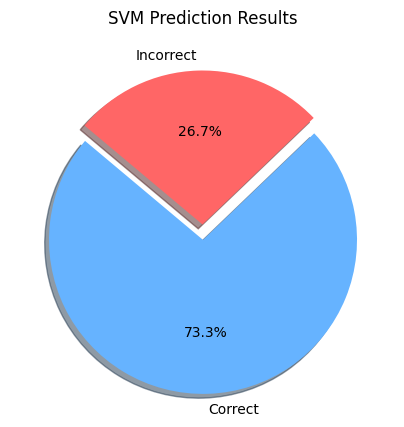

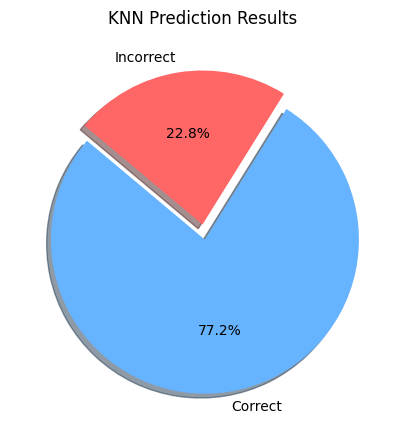

In [13]:
plot_pie_chart(y_test, svm_predictions, "SVM")
plot_pie_chart(y_test, knn_predictions, "KNN")

SVM & KNN's best parameters
- GridSearchCV
- RandomrizeSearchCV

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils import resample


X_train_sample, y_train_sample = resample(X_train, y_train, n_samples=10, random_state=42)

# SVM
svm_param_grid = {
    'kernel': ['linear'],  # poly와 sigmoid 제거 (잘 쓰이지 않음) , 'rbf'(너무 오래걸림) 그냥 파라미터가 여러개면 오래걸림..ㅠ
}

# SVM RandomizedSearch
svm_random_search = RandomizedSearchCV(SVC(), svm_param_grid, n_iter=5, cv=5, scoring='accuracy', n_jobs=-1, verbose=1, random_state=42)
svm_random_search.fit(X_train_sample, y_train_sample)

print(f'Best SVM Parameters: {svm_random_search.best_params_}')
print(f'Best SVM Accuracy: {svm_random_search.best_estimator_.score(X_test, y_test):.4f}')

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_

Best SVM Parameters: {'kernel': 'linear'}
Best SVM Accuracy: 0.6121


In [19]:
from sklearn.model_selection import RandomizedSearchCV

# KNN
knn_param_grid = {
    'n_neighbors': list(range(1, 16)),  # 1~15
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto'],  # 보통 'auto'가 가장 적절 → 다른 옵션 제거
    'leaf_size': [30],  # 기본값 사용
    'metric': ['euclidean', 'manhattan']  # 주요 거리 측정 방식만 유지
}

# KNN RandomizedSearch
knn_random_search = RandomizedSearchCV(KNeighborsClassifier(), knn_param_grid, n_iter=5, cv=5, scoring='accuracy', n_jobs=-1, verbose=1, random_state=42)
knn_random_search.fit(X_train, y_train)

print(f'Best KNN Parameters: {knn_random_search.best_params_}')
print(f'Best KNN Accuracy: {accuracy_score(y_test, knn_random_search.best_estimator_.predict(X_test)):.4f}')

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best KNN Parameters: {'weights': 'distance', 'n_neighbors': 7, 'metric': 'euclidean', 'leaf_size': 30, 'algorithm': 'auto'}
Best KNN Accuracy: 0.7664


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample

# SVM
# svm_param_grid = {  (너무 오래걸려요.....)
#     'C': [0.1, 1, 10],
#     'kernel': ['linear'],  # poly와 sigmoid 제거 (잘 쓰이지 않음) , 'rbf'(너무 오래걸림)
#     'gamma': ['scale', 0.01, 0.1],  # scale, auto와 몇 개의 값만 유지
#     'decision_function_shape': ['ovr']  # ovo는 잘 쓰이지 않음
# }

svm_param_grid = {
    'kernel': ['linear'],  # poly와 sigmoid 제거 (잘 쓰이지 않음) , 'rbf'(너무 오래걸림)
}

X_train_sample, y_train_sample = resample(X_train, y_train, n_samples=10, random_state=42)

# GridSearchCV Run
svm_grid_search = GridSearchCV(SVC(), svm_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
svm_grid_search.fit(X_train_sample, y_train_sample)

# Best SVM model & Evaluation
best_svm_model = svm_grid_search.best_estimator_
svm_best_params = svm_grid_search.best_params_
svm_best_predictions = best_svm_model.predict(X_test)
svm_best_acc = accuracy_score(y_test, svm_best_predictions)

print(f'🔹 Best SVM Parameters: {svm_best_params}')
print(f'🔹 Best SVM Accuracy: {svm_best_acc:.4f}')


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1 fits failed out of a total of 3.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, 

🔹 Best SVM Parameters: {'kernel': 'linear'}
🔹 Best SVM Accuracy: 0.6121


In [20]:
from sklearn.model_selection import GridSearchCV

# KNN
knn_param_grid = {
    'n_neighbors': list(range(1, 16)),  # 1~15
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto'],  # 보통 'auto'가 가장 적절 → 다른 옵션 제거
    'leaf_size': [30],  # 기본값 사용
    'metric': ['euclidean', 'manhattan']  # 주요 거리 측정 방식만 유지
}

# GridSearchCV RUN
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
knn_grid_search.fit(X_train, y_train)

# Best KNN model & Evaluate
best_knn_model = knn_grid_search.best_estimator_
knn_best_params = knn_grid_search.best_params_
knn_best_predictions = best_knn_model.predict(X_test)
knn_best_acc = accuracy_score(y_test, knn_best_predictions)

print(f'🔹 Best KNN Parameters: {knn_best_params}')
print(f'🔹 Best KNN Accuracy: {knn_best_acc:.4f}')

Fitting 5 folds for each of 60 candidates, totalling 300 fits
🔹 Best KNN Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}
🔹 Best KNN Accuracy: 0.7794


## Feature Importance
- SVM
  - default parameters: 0.7327
  - randomCV:
  - gridSearchCV:
- KNN
  - default parameters: 0.7724
  - randomCV: 0.7664
  - gridSearchCV: 0.7794
  - 결론: **KNN**은 **gridSearchCV**로 뽑은 성능이 가장 좋다.


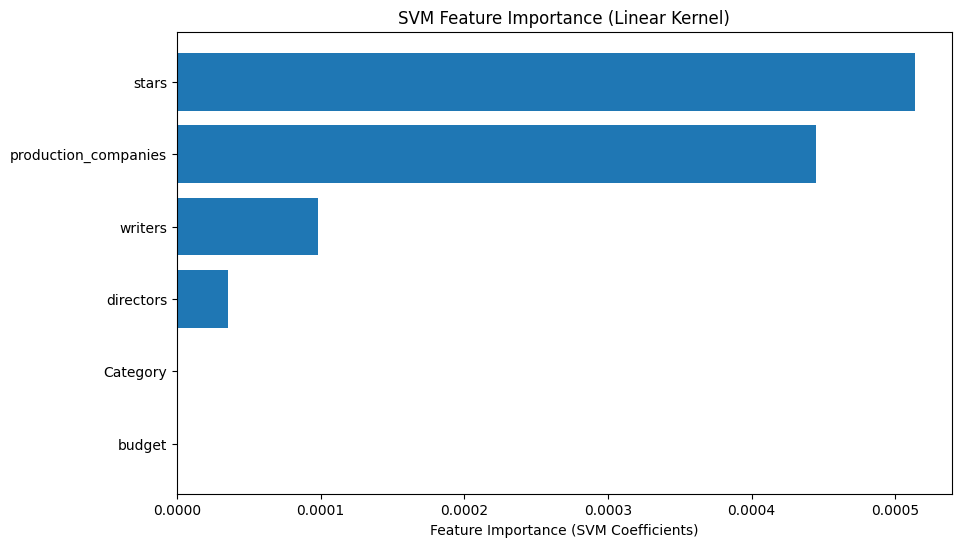

In [28]:
# SVM - linear 커널일때만..

svm_coef = np.abs(svm_random_search.best_estimator_.coef_).ravel()  # 가중치 절댓값
sorted_idx = np.argsort(svm_coef)  # 중요도 정렬

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), svm_coef[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
plt.xlabel("Feature Importance (SVM Coefficients)")
plt.title("SVM Feature Importance (Linear Kernel)")
plt.show()

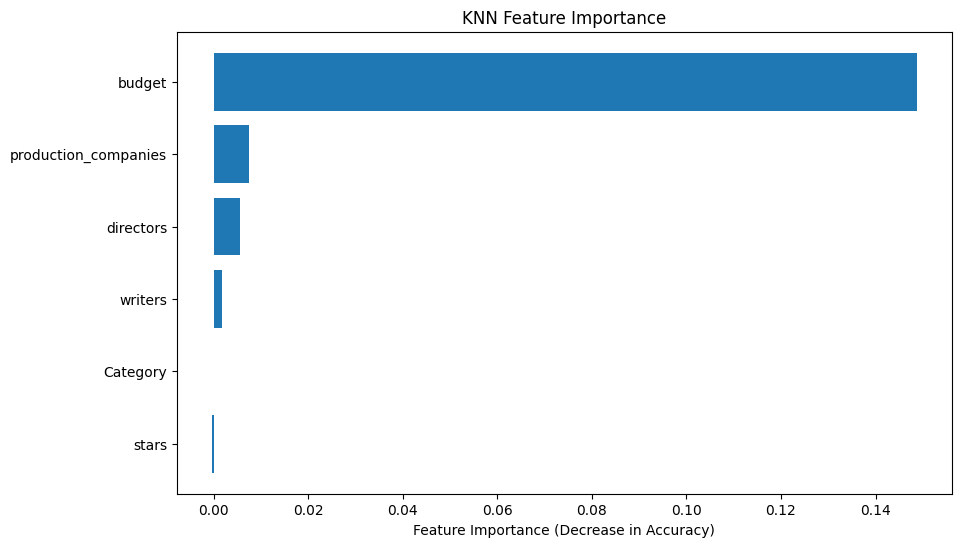

In [21]:
# KNN
from sklearn.inspection import permutation_importance

# KNN Feature Importance Calculate
knn_importance = permutation_importance(best_knn_model, X_test, y_test, scoring='accuracy', n_repeats=10, random_state=42, n_jobs=-1)

# Feature Importance Sorting
sorted_idx = knn_importance.importances_mean.argsort()

# Visualize
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), knn_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])  # feature_names는 X_train의 컬럼 리스트
plt.xlabel("Feature Importance (Decrease in Accuracy)")
plt.title("KNN Feature Importance")
plt.show()